<a href="https://colab.research.google.com/github/Renaldinho/MachineLearning/blob/main/CompulsoryCaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California housing multi layer perceptron

util functions

In [ ]:
def visualize_feature_scales(X):
  sns.boxplot(data=X)
  plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=90)
  plt.title('Feature Scales')
  plt.show()

def visualize_predictions(y_true, y_pred, title="Predictions vs. True Values"):
  """
  Visualizes the relationship between predicted and true values using a scatter plot.

  Args:
      y_true: A numpy array or list containing the true target values.
      y_pred: A numpy array or list containing the predicted values.
      title: The title of the plot (default: "Predictions vs. True Values").
  """

  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  plt.scatter(y_true, y_pred, alpha=0.5)  # Scatter plot with some transparency
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.title(title)

  # Add a diagonal line for reference (perfect predictions)
  min_val = min(min(y_true), min(y_pred))
  max_val = max(max(y_true), max(y_pred))
  plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Predictions')

  plt.legend()
  plt.show()

Setup

In [ ]:
# imports
import pandas as pd


In [ ]:
from sklearn.datasets import fetch_california_housing

# Fetch data
housing = fetch_california_housing()


# Get features and labels
X = housing.data
y = housing.target

feature_names = housing.feature_names




Statistical summary of data

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

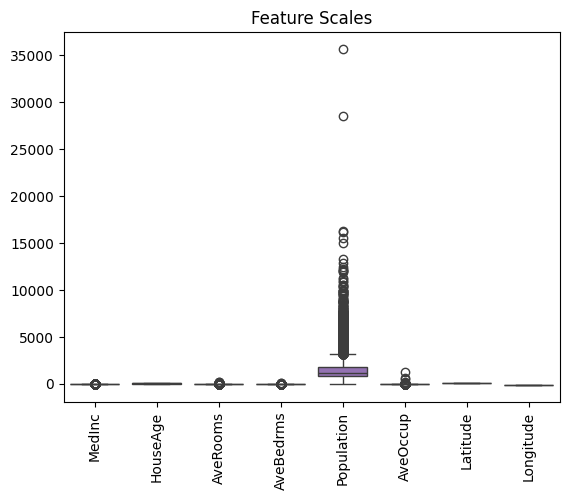

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

visualize_feature_scales(X)

Data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

Inspect feature scales again

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

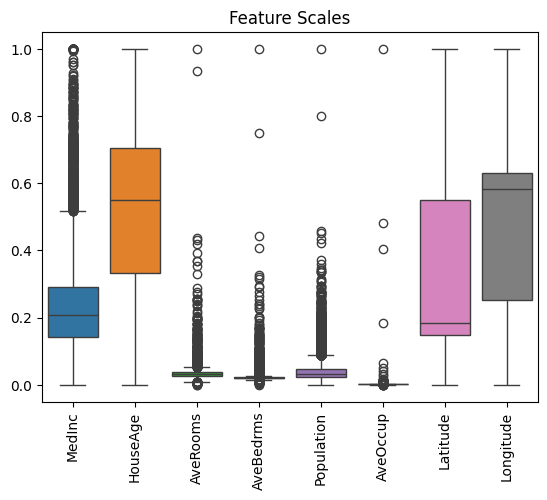

In [ ]:
visualize_feature_scales(X_scaled)

Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_training_full, X_test, y_training_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_validation, X_training, y_validation, y_training = train_test_split(X_training_full, y_training_full, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu'), # input layer
    Dense(64, activation='relu'),  # hidden layer
    Dense(1) ## output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


Train model


In [ ]:
training = model.fit(X_training, y_training, epochs=100, validation_data=(X_validation, y_validation))

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.2734 - mae: 1.4270 - val_loss: 0.9854 - val_mae: 0.7815
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9426 - mae: 0.7675 - val_loss: 0.6616 - val_mae: 0.5978
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6739 - mae: 0.6162 - val_loss: 0.5914 - val_mae: 0.5807
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.6135 - mae: 0.5864 - val_loss: 0.5739 - val_mae: 0.5550
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5877 - mae: 0.5667 - val_loss: 0.5737 - val_mae: 0.5792
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6365 - mae: 0.6003 - val_loss: 0.5622 - val_mae: 0.5297
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5980 - mae: 0.5623 - val_loss: 0.5388 - val_mae: 0.5400
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5736 - mae: 0.5519 - val_loss: 0.5303 - val_mae: 0.5267
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s

Visualize learning curves

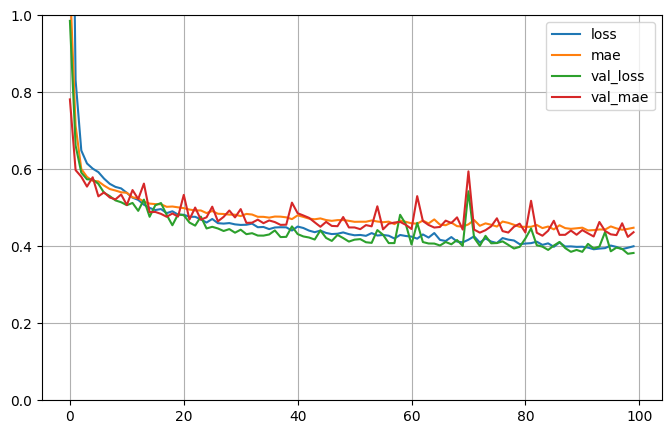

In [ ]:
pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
## We can see the training progress of the model across epochs

In [ ]:

X_test_subset = X_test[:3]
y_pred = model.predict(X_test_subset)


print("Predictions:", y_pred)
print("True Values:", y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions: [[0.62547946]
 [1.1916078 ]
 [3.2520602 ]]
True Values: [0.477   0.458   5.00001]


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


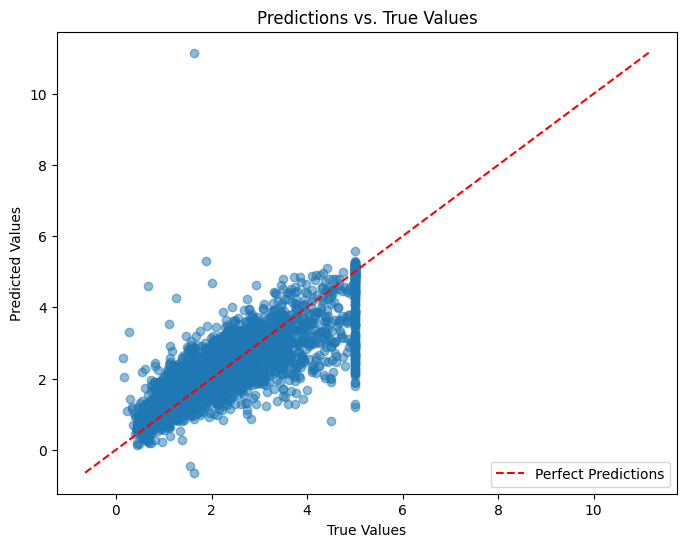

In [ ]:


visualize_predictions(y_test, model.predict(X_test).flatten())

Only one of the predicted values are close here, which is quite poor.

In [ ]:
lostt = model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4022 - mae: 0.4471


The loss rate is quite bad, we need to tune our hyperparameters

In [ ]:
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


Model builder function

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def build_model(hp):
  n_hidden = hp.Int('n_hidden', min_value=1, max_value=10, default=3)
  n_neurons = hp.Int('n_neurons', min_value=16, max_value=256, step=16, default=64)
  learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

  model = Sequential()
  model.add(Flatten())

  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation='relu'))
  model.add(Dense(1))

  optimizer = SGD(learning_rate=learning_rate)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'RootMeanSquaredError'])

  return model

Remove preexisting tuning

In [ ]:
!rm -rf my_dir/california_housing_tuning  # Delete the directory and its content

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Minimize validation loss
    max_trials=60,  # Number of hyperparameter combinations to try
    executions_per_trial=1  ,  # Run each trial 3 times to reduce noise
    directory='my_dir',  # Where to save results
    project_name='california_housing_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

tuner.search(X_training, y_training, epochs=150, validation_split=0.2, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

Trial 60 Complete [00h 00m 53s]
val_loss: 0.5329923033714294

Best val_loss So Far: 0.4703948497772217
Total elapsed time: 01h 16m 12s


In [ ]:
loss, mae, rmse = best_model.evaluate(X_test, y_test)

print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6766 - loss: 0.4579 - mae: 0.4853
Test Loss (MSE): 0.4640
Test MAE: 0.4847
Test RMSE: 0.6812


In [ ]:
tuner.oracle.get_best_trials(num_trials=1)[0].summary()

Trial 08 summary
Hyperparameters:
n_hidden: 10
n_neurons: 192
learning_rate: 0.0027157256420724187
Score: 0.4703948497772217


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


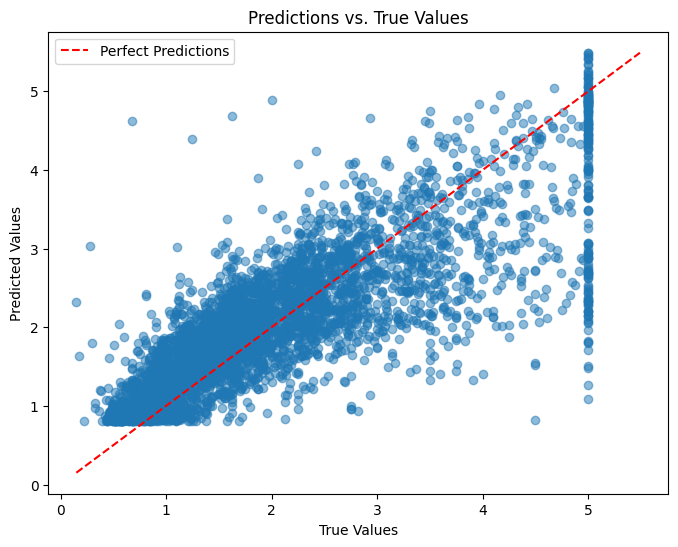

In [ ]:
visualize_predictions(y_test, best_model.predict(X_test).flatten())